## Package Installation

In [ ]:
!pip install kagglehub
!pip install plotly

## Standard Import

In [ ]:
import os
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from yellowbrick.target import FeatureCorrelation

import warnings
warnings.filterwarnings('ignore')

## Find the correct file path with the datasets and their names

In [ ]:
# Download latest version
path = kagglehub.dataset_download("vatsalmavani/spotify-dataset")

print("Path to dataset files:", path)

100%|██████████| 16.5M/16.5M [00:00<00:00, 47.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/vatsalmavani/spotify-dataset/versions/1


In [ ]:
# List all files in the dataset directory
files = os.listdir(path)
print("Files in dataset:", files)

Files in dataset: ['data']


In [ ]:
# Adjust path to point to the 'data' folder
data_path = os.path.join(path, 'data')

# List files in the 'data' folder
files = os.listdir(data_path)
print("Files in 'data' folder:", files)

Files in 'data' folder: ['data_by_year.csv', 'data_by_genres.csv', 'data_w_genres.csv', 'data.csv', 'data_by_artist.csv']


## Read Data

In [ ]:
data = pd.read_csv(os.path.join(data_path, 'data.csv'))
data_by_genres = pd.read_csv(os.path.join(data_path, 'data_by_genres.csv'))
data_by_artist = pd.read_csv(os.path.join(data_path, 'data_by_artist.csv'))
data_by_year = pd.read_csv(os.path.join(data_path, 'data_by_year.csv'))
data_w_genres = pd.read_csv(os.path.join(data_path, 'data_w_genres.csv'))

## data.csv

In [ ]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
data.shape

(170653, 19)

In [ ]:
data.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

### Check data types and NA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
data.describe()

,valence,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653.000000,1.706530e+05,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000
mean,0.528587,1976.787241,0.502115,0.537396,2.309483e+05,0.482389,0.084575,0.167010,5.199844,0.205839,-11.467990,0.706902,31.431794,0.098393,116.861590
std,0.263171,25.917853,0.376032,0.176138,1.261184e+05,0.267646,0.278249,0.313475,3.515094,0.174805,5.697943,0.455184,21.826615,0.162740,30.708533
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,0.415000,1.698270e+05,0.255000,0.000000,0.000000,2.000000,0.098800,-14.615000,0.000000,11.000000,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,0.548000,2.074670e+05,0.471000,0.000000,0.000216,5.000000,0.136000,-10.580000,1.000000,33.000000,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,0.668000,2.624000e+05,0.703000,0.000000,0.102000,8.000000,0.261000,-7.183000,1.000000,48.000000,0.075600,135.537000
max,1.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,100.000000,0.970000,243.507000


In [ ]:
data['explicit'].value_counts()

,count
explicit,
0,156220
1,14433


In [ ]:
data['mode'].value_counts()

,count
mode,
1,120635
0,50018


### Music Count by Decade

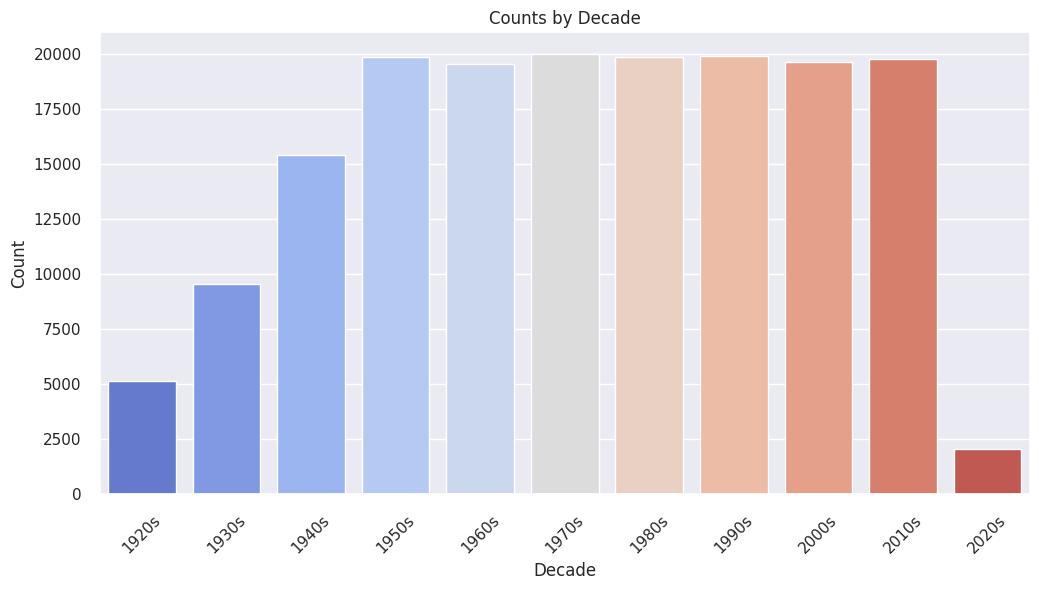

In [ ]:
def get_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade

data['decade'] = data['year'].apply(get_decade)

# Set figure size
sns.set(rc={'figure.figsize':(12, 6)})

# Create a colorful vertical countplot
sns.countplot(x='decade', data=data, palette="coolwarm")  # 'viridis' is one color map, but you can choose others like 'cool', 'plasma', etc.

# Adjust labels for better readability
plt.xlabel("Decade")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.title("Counts by Decade")
plt.show()

### Feature Correlation Plot against Target Variables

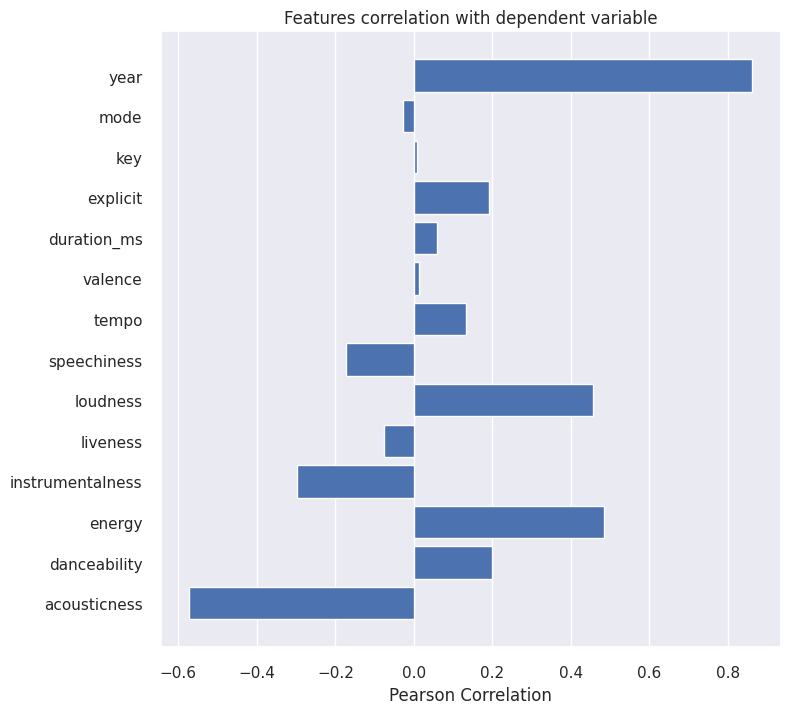

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [ ]:
feature_names = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
                 'tempo', 'valence', 'duration_ms', 'explicit', 'key', 'mode', 'year']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names
features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(8,8)
visualizer.fit(X, y)     # Fit the data to the visualizer
visualizer.show()

In [41]:
data.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo', 'decade'],
      dtype='object')

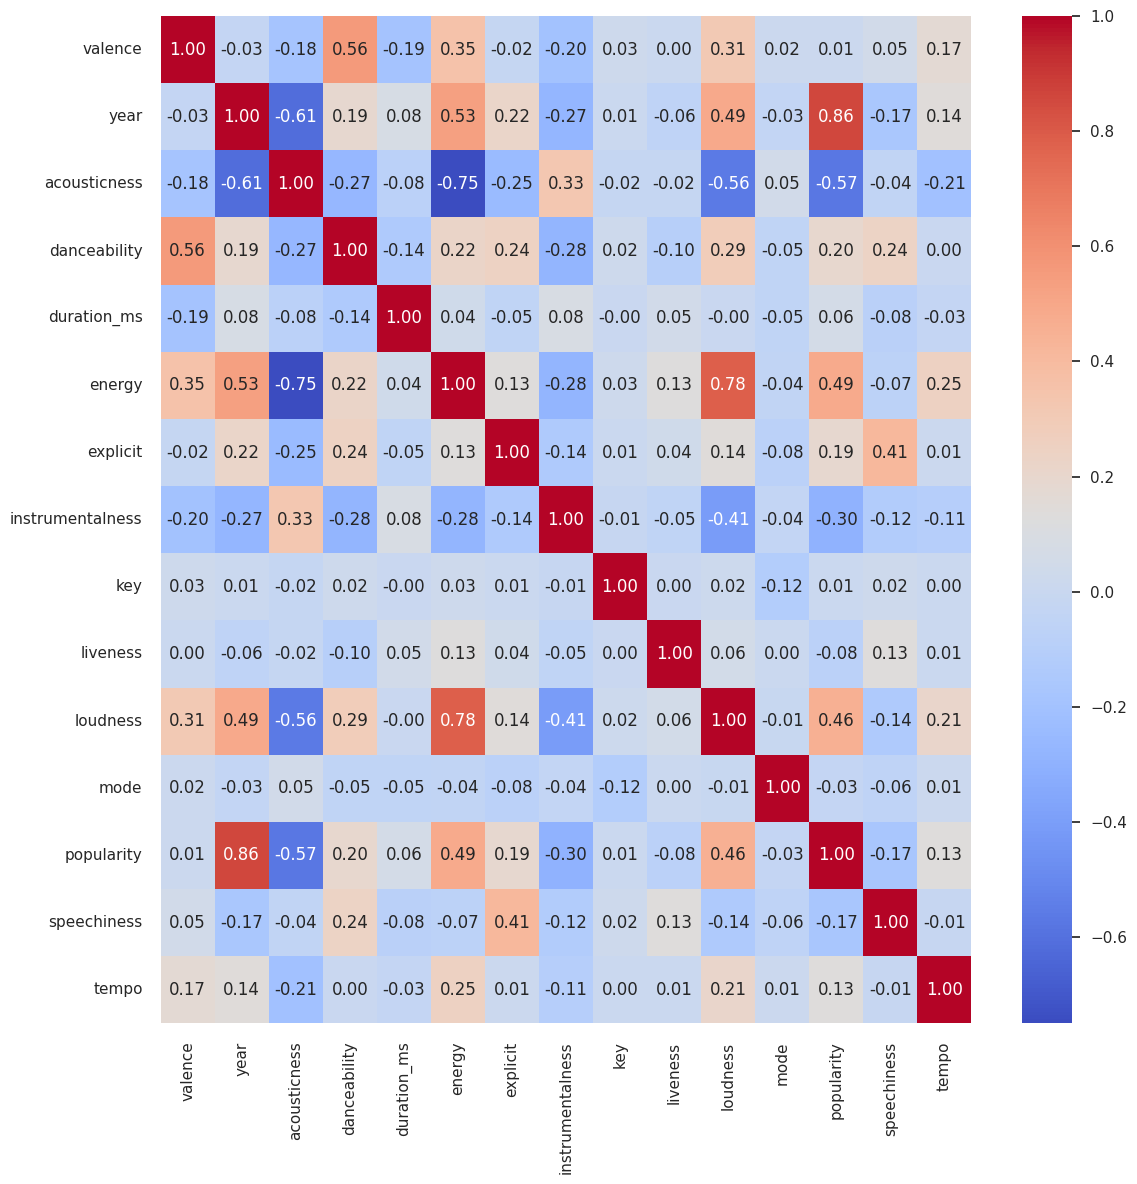

In [43]:
plt.figure(figsize=(12,12))

correlation_matrix = data[['valence', 'year', 'acousticness', 'danceability',
                           'duration_ms', 'energy', 'explicit', 'instrumentalness', 'key',
                           'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.tight_layout()
plt.show()

In [ ]:
# List of sound features
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

### Boxplots for Dummy Variables vs Target Variable

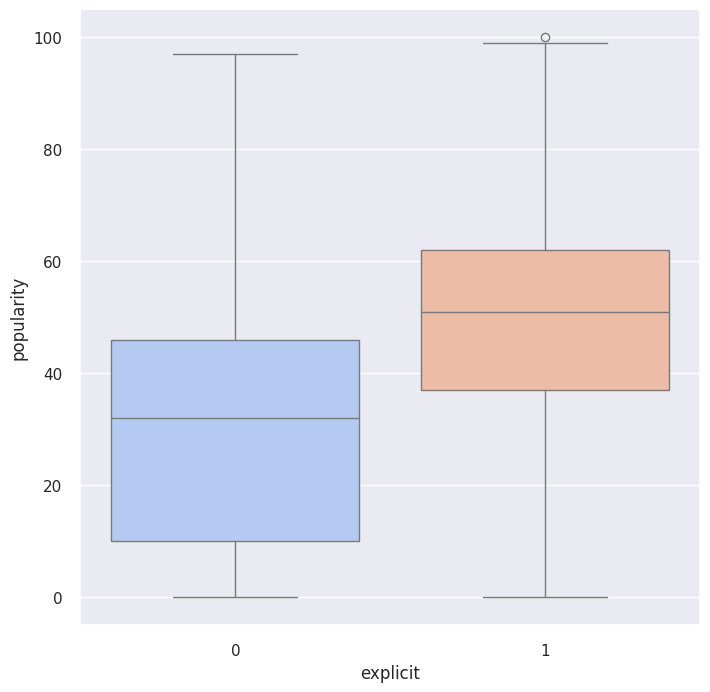

In [ ]:
sns.boxplot(x='explicit', y='popularity', data=data, palette='coolwarm');

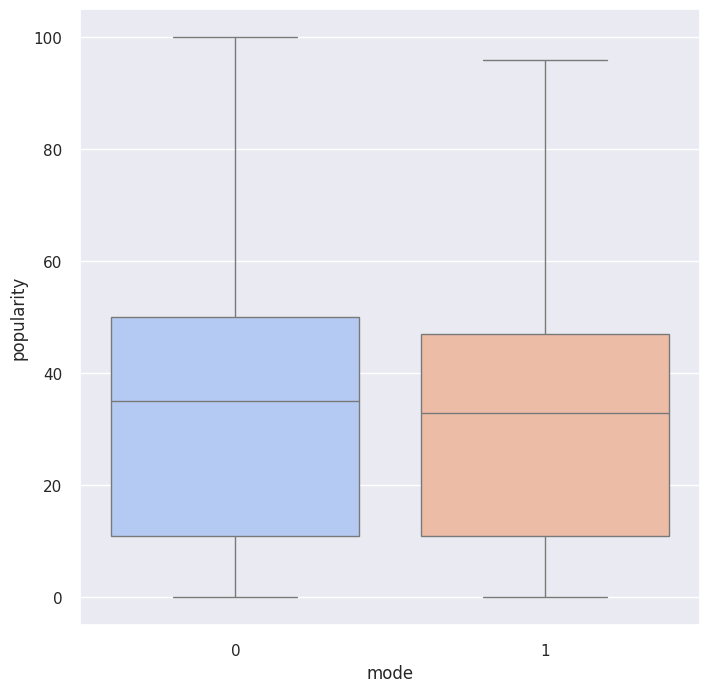

In [ ]:
sns.boxplot(x='mode', y='popularity', data=data, palette='coolwarm');

In [ ]:
data[data['explicit']==1]['popularity'].quantile(0.75) + 1.5*(data[data['explicit']==1]['popularity'].quantile(0.75) - data[data['explicit']==1]['popularity'].quantile(0.25))

99.5

In [ ]:
data[data['explicit']==1]['popularity'].nlargest(5)

,popularity
19611,100
19606,99
19608,96
19610,96
19612,96


### Check for (and remove) Outliers?

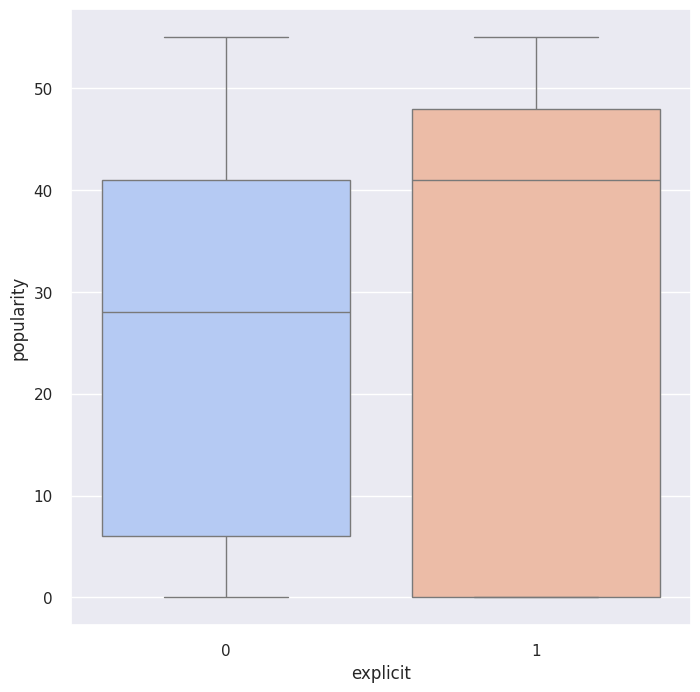

In [ ]:
def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 = 1.5 * IQR
    ls = df.index[(df[ft] < lower_bound) | (df[ft] > upper_bound)]
    return ls

index_list = []

for feature in ['popularity']:
    index_list.extend(outliers(data, feature))

def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

cleaned_df = remove(data, index_list)
sns.boxplot(x='explicit', y='popularity', data = cleaned_df, palette='coolwarm');

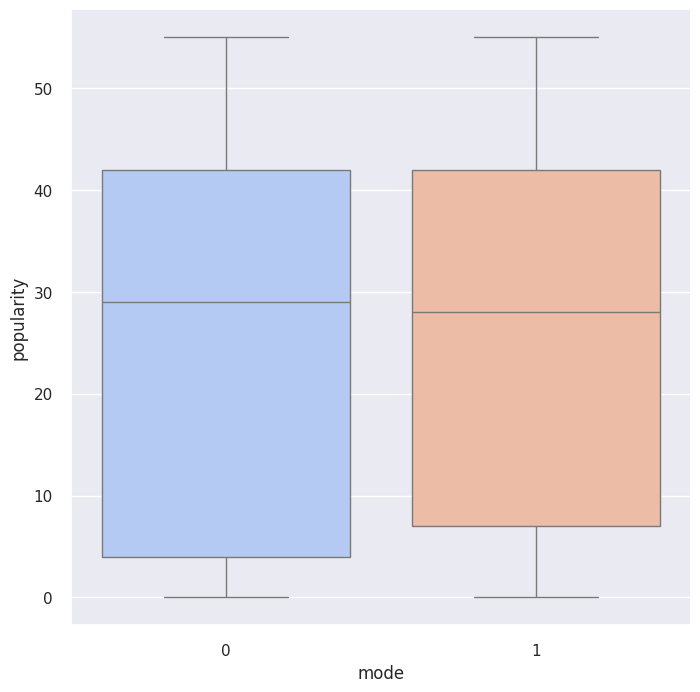

In [ ]:
sns.boxplot(x='mode', y='popularity', data=cleaned_df, palette='coolwarm');

In [ ]:
len(index_list)

24909

In [ ]:
cleaned_df['explicit'].value_counts()

,count
explicit,
0,137135
1,8609


In [ ]:
cleaned_df['mode'].value_counts()

,count
mode,
1,104258
0,41486


## data_by_genres

In [ ]:
data_by_genres.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [ ]:
data_by_genres.shape

(2973, 14)

In [ ]:
data_by_genres.columns

Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key'],
      dtype='object')

In [ ]:
top10_genres = data_by_genres.nlargest(10, 'popularity')

fig = px.bar(top10_genres, x='genres', y=sound_features, barmode='group')
fig.show()

## data_by_artist

In [ ]:
data_by_artist.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [ ]:
data_by_artist.shape

(28680, 15)

In [ ]:
data_by_artist.columns

Index(['mode', 'count', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness',
       'speechiness', 'tempo', 'valence', 'popularity', 'key'],
      dtype='object')

## data_by_year

In [ ]:
data_by_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [ ]:
data_by_year.shape

(100, 14)

In [ ]:
data_by_year.columns

Index(['mode', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence', 'popularity', 'key'],
      dtype='object')

In [ ]:
data_by_year.head()

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.205710,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.240720,-19.275282,0.116655,100.884521,0.535549,0.140845,10
2,1,1923,0.957247,0.577341,177942.362162,0.262406,0.371733,0.227462,-14.129211,0.093949,114.010730,0.625492,5.389189,0
3,1,1924,0.940200,0.549894,191046.707627,0.344347,0.581701,0.235219,-14.231343,0.092089,120.689572,0.663725,0.661017,10
4,1,1925,0.962607,0.573863,184986.924460,0.278594,0.418297,0.237668,-14.146414,0.111918,115.521921,0.621929,2.604317,5


In [ ]:
# Create a 3x2 subplot figure
fig = make_subplots(rows=3, cols=2, subplot_titles=sound_features)

# Add each feature to a subplot
for i, feature in enumerate(sound_features):
    row = i // 2 + 1
    col = i % 2 + 1
    fig.add_trace(
        go.Scatter(x=data_by_year['year'], y=data_by_year[feature], mode='lines', name=feature),
        row=row, col=col
    )

# Update layout for better visualization
fig.update_layout(height=600, width=900, title_text="Sound Features Over Time")
fig.show()

## data_w_genres

In [ ]:
data_w_genres.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7


In [ ]:
data_w_genres.shape

(28680, 16)

In [ ]:
data_w_genres.columns

Index(['genres', 'artists', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key', 'mode', 'count'],
      dtype='object')